In [54]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import os
import glob
from skimage.filters import gaussian
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame
from sklearn.cluster import KMeans

sys.path.append(r"D:\Projects\LEGO Vision\Helpers")
import helpers

In [55]:
image = cv2.imread(r"D:\LEGO Vision Datasets\classification-natural-data\3003-yellow\Original Photos_original_Original Photos_original_IMG_20181023_162038.jpg_2a145cfa-dcd6-469a-8985-118a14b09a37.jpg_2d1955b4-737e-4b66-816e-5b7df133b33c.jpg", 0)

In [56]:
image = cv2.resize(image, (256, 256))

In [80]:
image2 = cv2.imread(r"D:\LEGO Vision Datasets\Positive and Negative Samples for Linear SVM\neg\neg_original_IMG_20181106_145953.jpg_0bbb0c41-303d-42fe-9173-49cf68f1a9c8.jpg", 0)

In [81]:
image2 = cv2.resize(image2, (256, 256))

In [60]:
kmeans = KMeans(n_clusters=10)

In [58]:
%%time
len(helpers.gen_sift_features(gray_img=image)[-1])

Wall time: 990 µs


19

In [82]:
%%time
kp, desc = helpers.gen_sift_features(gray_img=image2)

Wall time: 999 µs


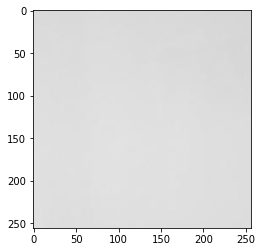

(<matplotlib.image.AxesImage at 0x24836848e48>, None)

In [83]:
img2 = cv2.drawKeypoints(image2, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [61]:
kmeans.fit(helpers.gen_sift_features(gray_img=image)[-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
predict_image = cv2.resize(cv2.imread(r"D:\LEGO Vision Datasets\Positive and Negative Samples for Linear SVM\neg\neg_original_IMG_20181106_145953.jpg_0b625050-962b-4e33-bcc9-786f28724c99.jpg", 0), (256,256))

In [67]:
print(helpers.gen_sift_features(gray_img=predict_image)[-1])

None


In [65]:
kmeans.predict([])

ValueError: Expected 2D array, got 1D array instead:
array=[nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.